In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [13]:
with open("SGC_results.json") as file:
    results_sgc = json.load(file)

### calculate mean values for each DRG

In [14]:
control_results = {"fabp7_per_nna": [],
                   "fabp7_per_npa": [],
                  "neurons_per_npa": [],
                  "fabp7_rings":[],
                  "fabp7_near":[],
                  "apoj_intensities_npa":[],
                  "apoj_intensities_nna":[]}

patient_results = {"fabp7_per_nna": [],
                   "fabp7_per_npa": [],
                  "neurons_per_npa": [],
                  "fabp7_rings":[],
                  "fabp7_near":[],
                  "apoj_intensities_npa":[],
                  "apoj_intensities_nna":[]}

 # exclude image with very few neurons
results_sgc[6]["fabp7_in_nna"].pop(0)
results_sgc[6]["fabp7_in_npa"].pop(0)
results_sgc[6]["neurons_per_npa"].pop(0)
results_sgc[6]["fabp7_rings"].pop(0)
results_sgc[6]["fabp7_near"].pop(0)
results_sgc[6]["apoj_intensities_npa"].pop(0)
results_sgc[6]["apoj_intensities_nna"].pop(0)

for result in results_sgc:
    if "control" in result["path"]:
        control_results["fabp7_per_nna"].append(np.mean(result["fabp7_in_nna"]))
        control_results["fabp7_per_npa"].append(np.mean(result["fabp7_in_npa"]))
        control_results["neurons_per_npa"].append(np.mean(result["neurons_per_npa"]))
        control_results["fabp7_rings"].append(np.mean(result["fabp7_rings"]))
        control_results["fabp7_near"].append(np.mean(result["fabp7_near"]))
        control_results["apoj_intensities_npa"].append(np.mean(result["apoj_intensities_npa"]))
        control_results["apoj_intensities_nna"].append(np.mean(result["apoj_intensities_nna"]))
        
    elif "patient" in result["path"]:
        patient_results["fabp7_per_nna"].append(np.mean(result["fabp7_in_nna"]))
        patient_results["fabp7_per_npa"].append(np.mean(result["fabp7_in_npa"]))
        patient_results["neurons_per_npa"].append(np.mean(result["neurons_per_npa"]))
        patient_results["fabp7_rings"].append(np.mean(result["fabp7_rings"]))
        patient_results["fabp7_near"].append(np.mean(result["fabp7_near"]))
        patient_results["apoj_intensities_npa"].append(np.mean(result["apoj_intensities_npa"]))
        patient_results["apoj_intensities_nna"].append(np.mean(result["apoj_intensities_nna"]))

#### exclude data from control 4 (bad stainig and segmentation quality)

In [16]:
control_results["neurons_per_npa"].pop(3)

control_results["fabp7_per_nna"].pop(3)
control_results["fabp7_per_npa"].pop(3)

control_results["fabp7_rings"].pop(3)
control_results["fabp7_near"].pop(3)

control_results["apoj_intensities_npa"].pop(3)
control_results["apoj_intensities_nna"].pop(3)

1.8673777236025166

In [17]:
control_results 

{'fabp7_per_nna': [0.26823836763840114,
  0.16260258366783178,
  0.1853245849578563,
  0.1457679053437401,
  0.12931066493606166],
 'fabp7_per_npa': [0.08062087571527735,
  0.05670190225330319,
  0.04521635698860118,
  0.046752489384850465,
  0.04419340030485958],
 'neurons_per_npa': [18.80118059806572,
  37.64828463133377,
  15.623762339348316,
  29.74089096032834,
  19.3212331110968],
 'fabp7_rings': [67.29918362942811,
  62.87369160855568,
  48.120810281766296,
  30.806857591086615,
  9.397877145335125],
 'fabp7_near': [97.90390953435443,
  98.00498007977092,
  97.86331748943938,
  94.15023287403959,
  93.35898474723956],
 'apoj_intensities_npa': [1.7625958504286579,
  1.8341478827986386,
  2.7287777261214536,
  3.5172978653399,
  3.2081351681782415],
 'apoj_intensities_nna': [1.49769937235132,
  1.659729100989299,
  1.8654970323662,
  2.2274730381258596,
  2.270369291853631]}

In [18]:
patient_results

{'fabp7_per_nna': [0.1275296156187521,
  0.14405442092740192,
  0.1412410551966711,
  0.14182753256788241,
  0.13446812443349296,
  0.13601616133431757],
 'fabp7_per_npa': [0.033348831167188384,
  0.03885496472606655,
  0.059421377892478276,
  0.05828967063113183,
  0.038732807945625426,
  0.04543471807843485],
 'neurons_per_npa': [19.864917376206396,
  29.57949937112734,
  40.57039958288018,
  39.22952168296124,
  26.866013500480392,
  35.67149102217422],
 'fabp7_rings': [49.712988920037375,
  56.1676125409678,
  70.43338122943804,
  47.41801662540089,
  56.83879989142704,
  52.361958336936766],
 'fabp7_near': [92.59110933119743,
  97.15554912923335,
  95.89014303875445,
  96.08333114495584,
  93.20031258337742,
  97.57412625402272],
 'apoj_intensities_npa': [2.9131905739632504,
  2.1800346273213678,
  2.1409338001862257,
  2.5488150402158936,
  2.3579597542085105,
  2.690836440701452],
 'apoj_intensities_nna': [2.2376033369381574,
  1.740521472295022,
  1.7056037965690714,
  2.139884

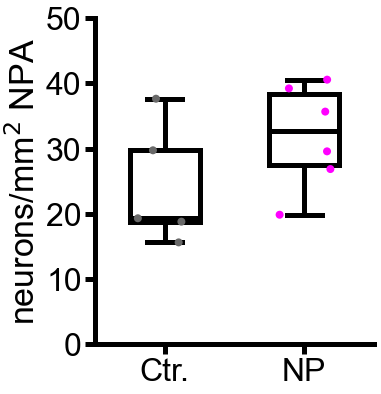

In [20]:
plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 50])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)


plt.ylabel('neurons/mm$^2$ NPA', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results["neurons_per_npa"] , patient_results["neurons_per_npa"]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results["neurons_per_npa"] , patient_results["neurons_per_npa"]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('neurons_per_npa_SGC.png', bbox_inches = "tight")
plt.show()

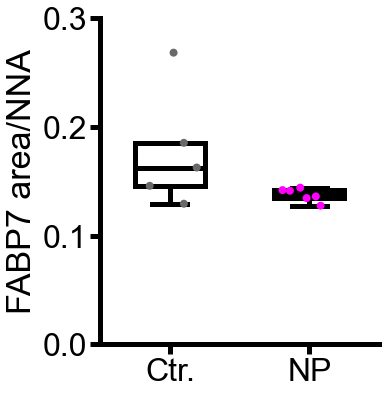

In [21]:
parameter = 'fabp7_per_nna'

plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 0.3])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(0, 0.4, 0.1), fontname="Arial", fontsize=fontsize)


plt.ylabel('FABP7 area/NNA', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results[parameter], patient_results[parameter]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results[parameter] , patient_results[parameter]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('Fabp7_per_NNA.png', bbox_inches = "tight")
plt.show()

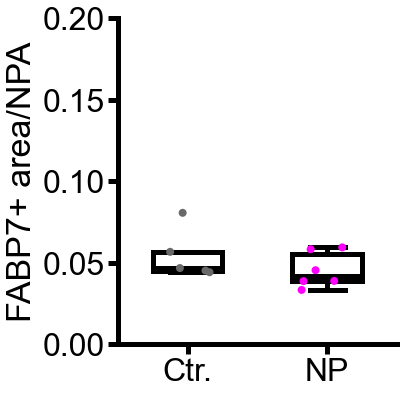

In [24]:
parameter = 'fabp7_per_npa'

plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 0.2])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(0, 0.25, 0.05), fontname="Arial", fontsize=fontsize)


plt.ylabel('FABP7+ area/NPA', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results[parameter], patient_results[parameter]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results[parameter] , patient_results[parameter]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('Fabp7_per_NPA.png', bbox_inches = "tight")
plt.show()

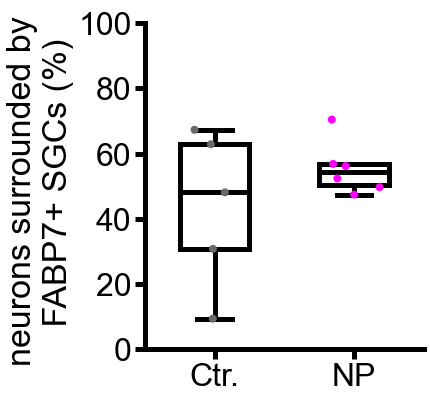

In [28]:
parameter = 'fabp7_rings'

plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 100])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(0, 101, 20), fontname="Arial", fontsize=fontsize)


plt.ylabel('neurons surrounded by \n FABP7+ SGCs (%)', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results[parameter], patient_results[parameter]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results[parameter] , patient_results[parameter]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('Fabp7_rings.png', bbox_inches = "tight")
plt.show()

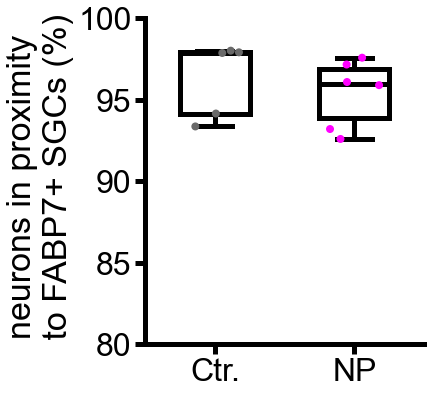

In [29]:
parameter = 'fabp7_near'

plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([80, 100])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(80, 101, 5), fontname="Arial", fontsize=fontsize)


plt.ylabel('neurons in proximity \n to FABP7+ SGCs (%)', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results[parameter], patient_results[parameter]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results[parameter] , patient_results[parameter]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('Fabp7_near.png', bbox_inches = "tight")
plt.show()

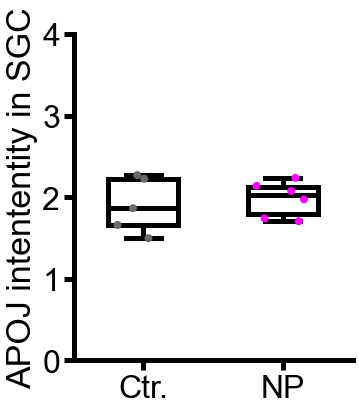

In [32]:
parameter = 'apoj_intensities_nna'

plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']
c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 4])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(0, 5, 1), fontname="Arial", fontsize=fontsize)


plt.ylabel('APOJ intententity in SGC', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results[parameter], patient_results[parameter]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results[parameter] , patient_results[parameter]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('ApoJ_intensity_NNA_in_SGC.png', bbox_inches = "tight")
plt.show()

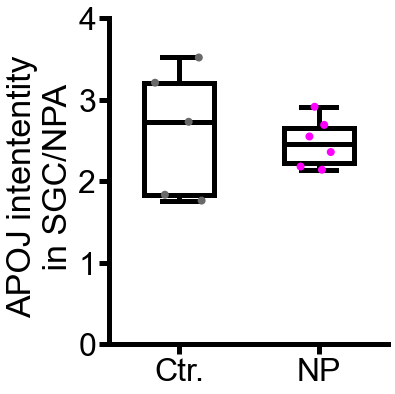

In [33]:
parameter = 'apoj_intensities_npa'

plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']
c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 4])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(0, 5, 1), fontname="Arial", fontsize=fontsize)

plt.ylabel('APOJ intententity \n in SGC/NPA', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results[parameter], patient_results[parameter]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results[parameter] , patient_results[parameter]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('APOJ_intensity_NPA_in_SGC.png', bbox_inches = "tight")
plt.show()